# Business Understanding
At SyriaTel, a leading telecommunications company, we understand the paramount importance of retaining our valued customers in today's competitive telecom landscape. With over 95% of Americans already owning a cell phone, customer retention is not just a priority; it's a strategic imperative. We recognize that acquiring new customers can be up to 25 times more costly than retaining existing ones. 

To address this challenge, we aim to uncover actionable insights into customer behavior, particularly identifying patterns indicative of potential churn.

Our objective is clear: to build robust predictive models that forecast customer churn probability, enabling us to take proactive measures to retain our customers effectively. Whether it's identifying customers enticed by competitor offers, addressing service issues promptly, or personalizing our offerings to match individual preferences, our approach is centered on enhancing customer satisfaction and loyalty.

In this dynamic industry landscape, staying ahead requires continuous adaptation. We remain committed to refining our models, incorporating evolving market dynamics and customer behavior trends, to ensure our retention strategies remain not just effective, but exceptional. At SyriaTel, we're not just predicting churn; we're cultivating enduring customer relationships.

## Business Problem
The business problem at Syria Tel revolves around a significant rate of customer churn. This ongoing departure of customers is adversely affecting the company's revenue streams and its competitive stance within the telecommunications market. To address this challenge, Syria Tel must swiftly identify potential churners and devise effective strategies aimed at retaining these customers while simultaneously enhancing overall customer satisfaction.

## Objectives
1. Developing robust machine learning models capable of accurately predicting the likelihood of customer churn. These models will leverage a diverse range of features including demographic information, account details, and service usage patterns to provide actionable insights into customer behavior.

2. Identifying and implementing the most effective machine learning algorithms for accurately classifying churn and non-churn customers. Through rigorous testing and evaluation, we aim to select the model that best meets our predictive accuracy requirements.

3. Conducting in-depth analyses to discern which specific features have the most significant impact on customer churn rates. By uncovering these key drivers, we can formulate targeted recommendations and strategies aimed at mitigating churn and fostering customer loyalty.

In [236]:
# import necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline, make_pipeline
df_ = pd.read_csv("bigml.csv")

# Ignore warnings
warnings.filterwarnings("ignore")
import pprint

### Introduction
The "data_EDA" class is designed to facilitate exploratory data analysis on a dataset loaded from a CSV file. This class provides several methods to summarize the dataset, visualize distributions, check for missing values, identify duplicates, assess multicollinearity, and visualize data through box plots. Below is a detailed explanation of each method and how to use them.
#### Class and Method Overview
##### Initialization
The class is initialized with the path to the CSV file. The dataset is loaded into a pandas DataFrame during initialization.
##### Display Summary
The display_summary method provides an overview of the dataset, including the data types of each column, descriptive statistics, and a sample of the dataset.
##### Histogram
The histogram method generates a histogram for a specified column, showing the distribution of values in that column.
##### Display Data Types
The display_data_types method lists all numerical and categorical features in the dataset.
##### Missing Values
The missing_values method checks for missing values in the dataset and prints the count of missing values for each column.
##### Duplicates
The duplicates method checks for duplicate rows in the dataset and prints the count of duplicates.
##### Check Multicollinearity
The check_multicollinearity method calculates and prints the correlation matrix of numerical features. It also visualizes the correlation matrix using a heatmap.
##### Box Plots
The plot_box_plots method generates box plots for specified columns to visualize the spread and identify potential outliers.

In [207]:
class data_EDA:
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)

    def display_summary(self):
        print("Dataset Summary:")
        print(self.data.info())
        print("\nDescriptive Statistics:")
        print(self.data.describe())
        print("\nDataset Sample:")
        print(self.data.head())

    def histogram(self, column):
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data[column], bins=len(set(self.data[column])), kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    def display_data_types(self):
        # Numerical Columns
        print(f"Numerical Features: {self.data.select_dtypes(include='number').columns}\n")

        # Categorical Columns
        print(f"Categorical Features: {self.data.select_dtypes(include=['object', 'bool']).columns}")

        
    def missing_values(self):
        missing_counts = self.data.isnull().sum()
        print("Missing Value Counts:")
        print(missing_counts)
        
    def duplicates(self):
        #checking for duplicates 
        print(self.data.duplicated().value_counts())
        
    def check_multicollinearity(self):
        # Select only numerical columns
        numerical_columns = self.data.select_dtypes(include='number')

        # Calculate the correlation matrix
        correlation_matrix = numerical_columns.corr()

        # Display the correlation matrix
        print("Correlation Matrix:")
        print(correlation_matrix)

        # You can also visualize the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
        
    def plot_box_plots(self, columns):
        plt.figure(figsize=(10, 6))
        for col in columns:
            sns.boxplot(x=self.data[col])
            plt.title(f"Box Plot for {col}")
            plt.xlabel(col)
            plt.show()
        
data = "bigml.csv"
df = data_EDA(data)


In [208]:
# Display  information about columns, data types, and non-null counts, along with descriptive statistics and a sample of the dataset.
df.display_summary()

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls      

# Data Understanding
This dataset, sourced from Kaggle, comprises information related to customer telecommunications data. Here's a breakdown of its structure and contents:

- **RangeIndex**: The dataset contains 3333 entries, indexed from 0 to 3332.

- **Data columns**: There are a total of 21 columns in the dataset.

    1. **state**: The state in which the customer resides (object type).
    
    2. **account length**: The length of time the customer has been with the telecommunications company, measured in days (int64).
    
    3. **area code**: The area code associated with the customer's phone number (int64).
    
    4. **phone number**: The customer's phone number (object type).
    
    5. **international plan**: Whether the customer has an international calling plan (object type).
    
    6. **voice mail plan**: Whether the customer has a voicemail plan (object type).
    
    7. **number vmail messages**: The number of voicemail messages received by the customer (int64).
    
    8. **total day minutes**: The total number of minutes the customer used their phone during the day (float64).
    
    9. **total day calls**: The total number of calls made by the customer during the day (int64).
    
    10. **total day charge**: The total charge for day calls incurred by the customer (float64).
    
    11. **total eve minutes**: The total number of minutes the customer used their phone during the evening (float64).
    
    12. **total eve calls**: The total number of calls made by the customer during the evening (int64).
    
    13. **total eve charge**: The total charge for evening calls incurred by the customer (float64).
    
    14. **total night minutes**: The total number of minutes the customer used their phone during the night (float64).
    
    15. **total night calls**: The total number of calls made by the customer during the night (int64).
    
    16. **total night charge**: The total charge for night calls incurred by the customer (float64).
    
    17. **total intl minutes**: The total number of international minutes used by the customer (float64).
    
    18. **total intl calls**: The total number of international calls made by the customer (int64).
    
    19. **total intl charge**: The total charge for international calls incurred by the customer (float64).
    
    20. **customer service calls**: The number of customer service calls made by the customer (int64).
    
    21. **churn**: A boolean value indicating whether the customer churned (i.e., stopped doing business) with the telecommunications company (bool).

The dataset encompasses a comprehensive array of customer-related features, providing valuable insights into customer behavior, usage patterns, and service preferences, which can be leveraged for predictive modeling and analysis, particularly in the context of predicting customer churn.

In [209]:
# Display missing values in the dataset
df.missing_values()

Missing Value Counts:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [210]:
# Separate categorical features from numerical features
df.display_data_types()

Numerical Features: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Features: Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


In [211]:
# Display number of duplicate values from the class
df.duplicates()

False    3333
dtype: int64


Correlation Matrix:
                        account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.00

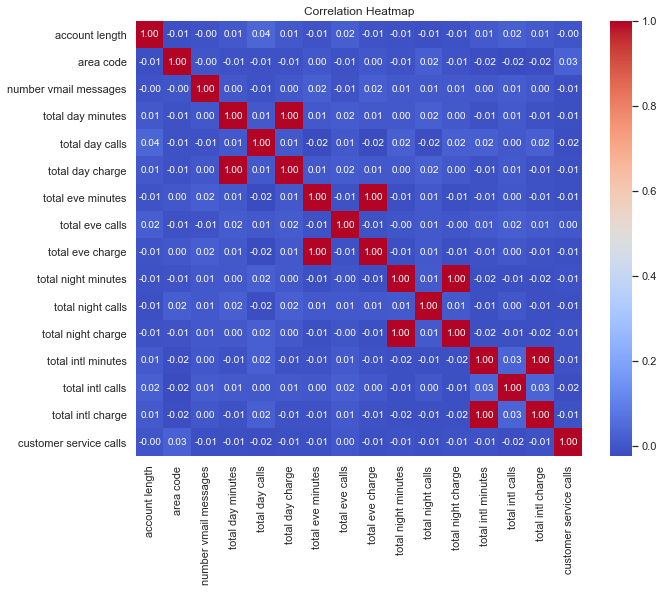

In [212]:
# Checking for multicollinearity within the features
df.check_multicollinearity()

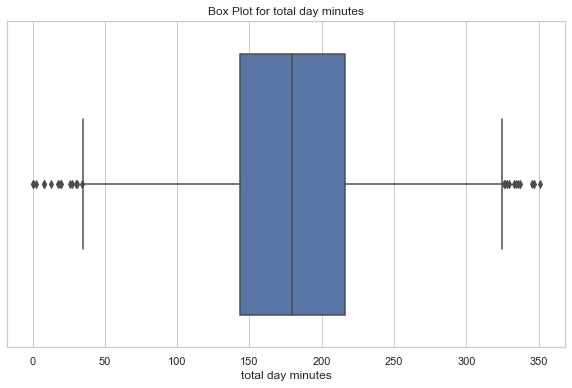

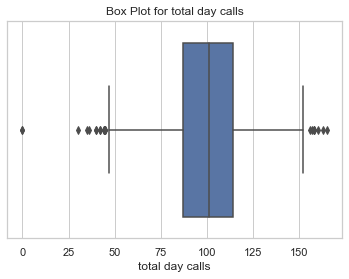

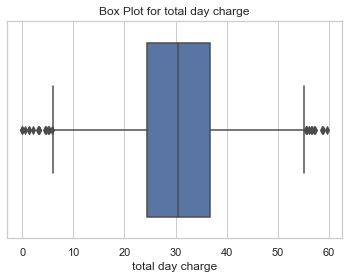

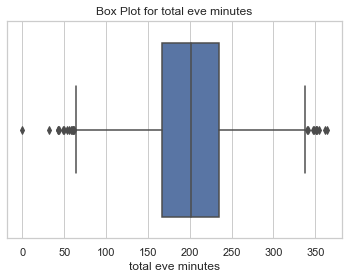

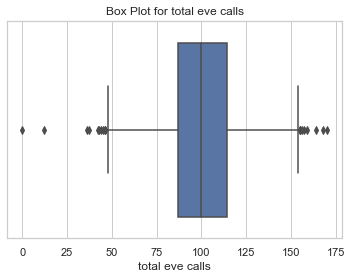

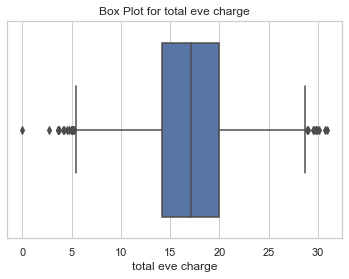

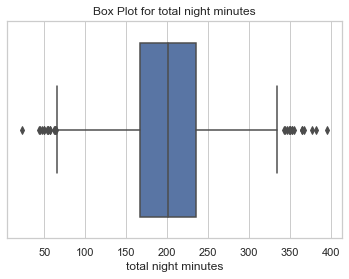

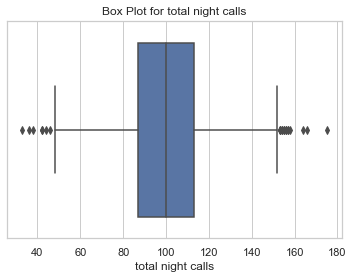

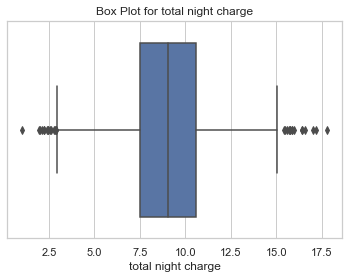

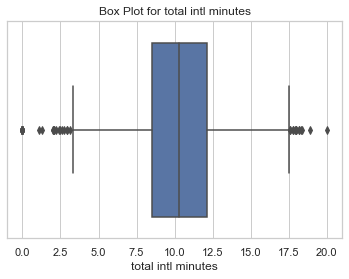

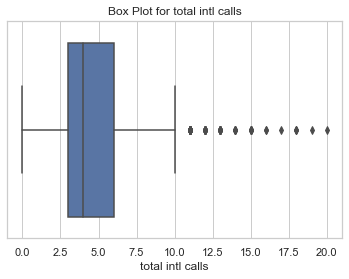

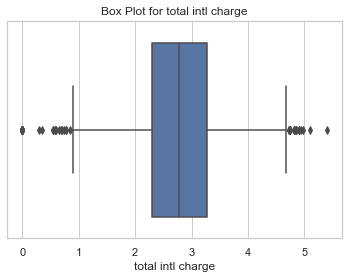

In [137]:
# Display box plots to find outliers and visualize central tendencies
df.plot_box_plots(
    ["total day minutes",
     "total day calls",
     "total day charge",
     "total eve minutes",
     "total eve calls",
     "total eve charge",
     "total night minutes",
     "total night calls",
     "total night charge",
     "total intl minutes",
     "total intl calls",
     "total intl charge"
    ])

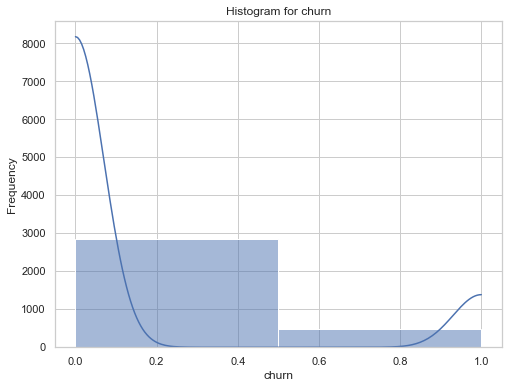

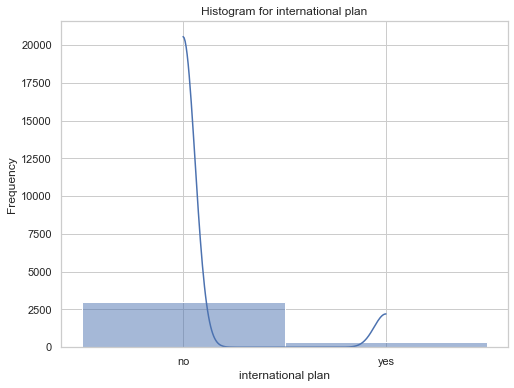

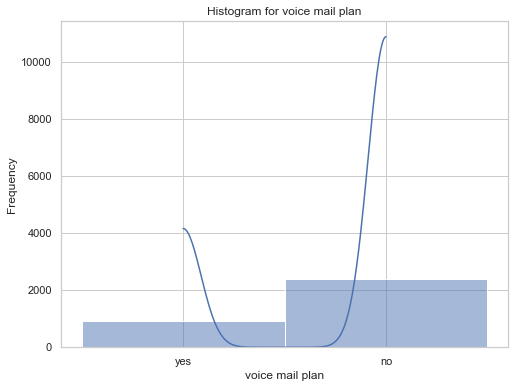

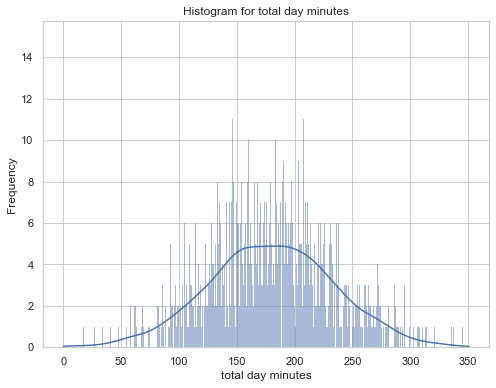

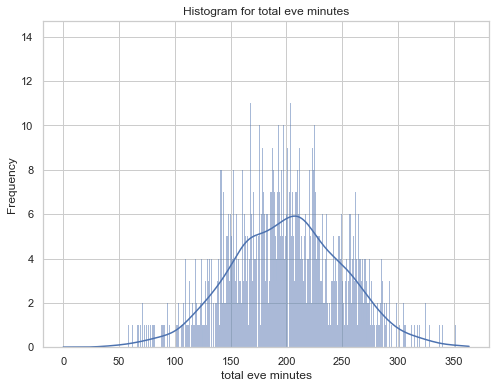

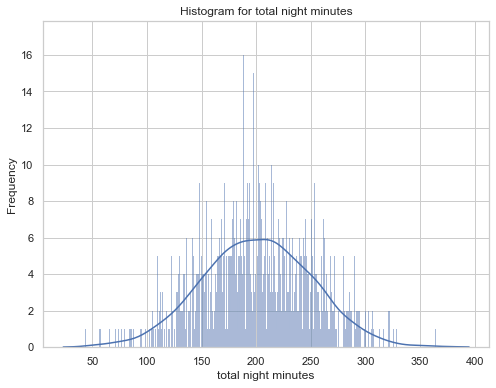

In [138]:
# Display histograms within categorical data altogether
df.histogram("churn")
df.histogram("international plan")
df.histogram("voice mail plan")
df.histogram('total day minutes')
df.histogram('total eve minutes')
df.histogram('total night minutes')

### Data Cleaning
The CleanDataEDA class is an extension of the data_EDA class, inheriting its methods and functionality while adding additional data cleaning and preprocessing steps. This class is designed to prepare the dataset for analysis and modeling by handling common data quality issues.
#### clean_data
This method performs several data cleaning operations:

Remove Column Spaces: Replaces spaces in column names with underscores to ensure compatibility with various data manipulation operations.
Remove Outliers: Uses the Interquartile Range (IQR) method to identify and remove outliers from the dataset.
Add Total Calls Column: Creates a new column, total_calls, which is the sum of day, evening, night, and international calls.

#### drop_multicollinear_features
This method identifies and removes features that are highly correlated (multicollinear) to reduce redundancy and improve model performance:

Calculate Correlation Matrix: Computes the correlation matrix for numerical columns.
Identify Highly Correlated Features: Finds pairs of features with a correlation coefficient above a specified threshold (default is 0.8).
Drop Correlated Features: Removes the identified correlated features from the dataset.

#### display_summary
This method overrides the display_summary method of the parent class to include data cleaning before displaying the summary. It calls the clean_data method first to ensure the data is cleaned before presenting the summary, descriptive statistics, and a sample of the cleaned data.



In [139]:
class CleanDataEDA(data_EDA):
    def __init__(self, csv_path):
        super().__init__(csv_path)

    def clean_data(self):
        
#         remove column spaces
        self.data.columns = self.data.columns.str.replace(' ', '_')
    
#         drop phone number
        self.data.drop(columns=['phone_number'], inplace=True)
    
        
#         remove outliers
        float_columns = self.data.select_dtypes(include='float')
        Q1 = self.data.quantile(0.25)
        Q3 = self.data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.data = self.data[(self.data >= lower_bound) & (self.data <= upper_bound)]
        
#         add total calls column
        self.data['total_calls'] = (
            self.data.loc[:, 'total_day_calls']
            + self.data.loc[:, 'total_eve_calls']
            + self.data.loc[:, 'total_night_calls']
            + self.data.loc[:, 'total_intl_calls']
    )
    
    def drop_multicollinear_features(self, threshold=0.8):
        # Select only numerical columns
        numerical_columns = self.data.select_dtypes(include='number')

        # Calculate the correlation matrix
        correlation_matrix = numerical_columns.corr()

        # Find features with high correlation
        correlated_features = set()
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > threshold:
                    colname = correlation_matrix.columns[i]
                    correlated_features.add(colname)

        # Drop the correlated features
        self.data.drop(columns=correlated_features, inplace=True)

        # Display the remaining features
        print("Remaining Features after Dropping Multicollinear Features:")
        print(self.data.columns)
    
    
    def display_summary(self):
        # Override the display_summary method
        self.clean_data()
        print("Cleaned Dataset Summary:")
        print(self.data.info())
        print("\nCleaned Descriptive Statistics:")
        print(self.data.describe())
        print("\nCleaned Dataset Sample:")
        print(self.data.head())


clean_df = CleanDataEDA("bigml.csv")
clean_df.display_summary()

Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   0 non-null      object 
 1   account_length          3315 non-null   float64
 2   area_code               3333 non-null   int64  
 3   international_plan      0 non-null      object 
 4   voice_mail_plan         0 non-null      object 
 5   number_vmail_messages   3332 non-null   float64
 6   total_day_minutes       3308 non-null   float64
 7   total_day_calls         3310 non-null   float64
 8   total_day_charge        3308 non-null   float64
 9   total_eve_minutes       3309 non-null   float64
 10  total_eve_calls         3313 non-null   float64
 11  total_eve_charge        3309 non-null   float64
 12  total_night_minutes     3303 non-null   float64
 13  total_night_calls       3311 non-null   float64
 14  total_night_cha

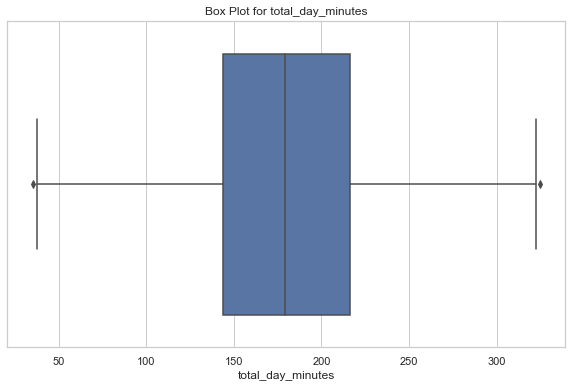

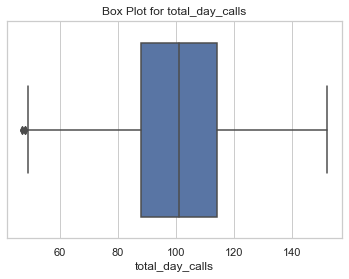

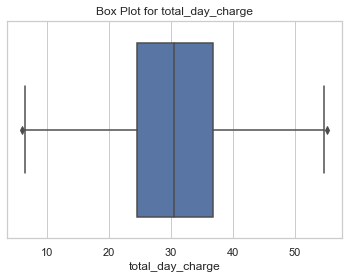

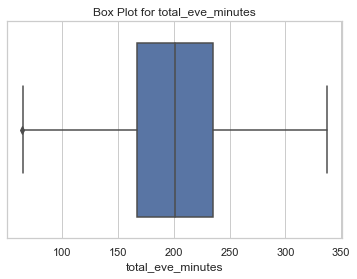

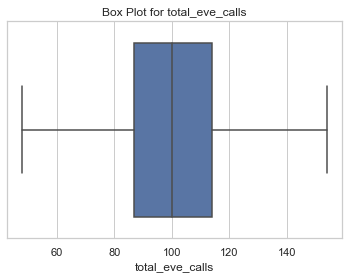

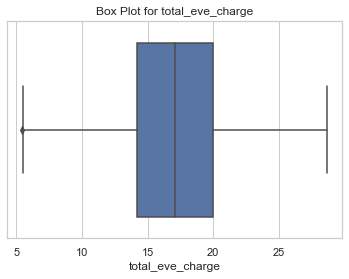

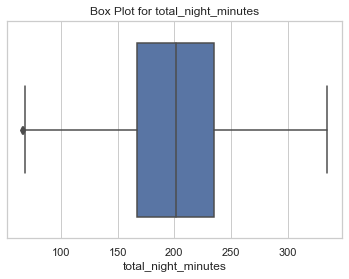

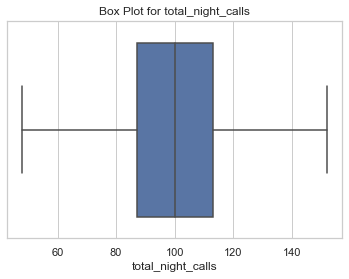

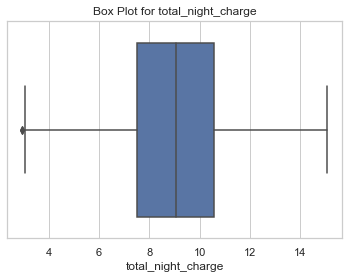

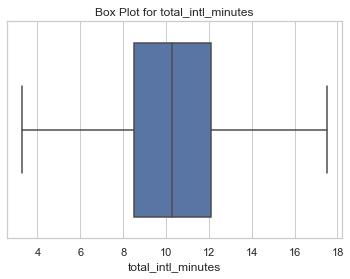

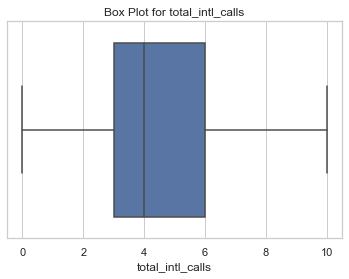

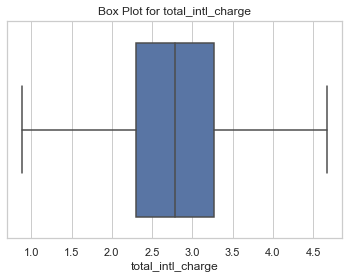

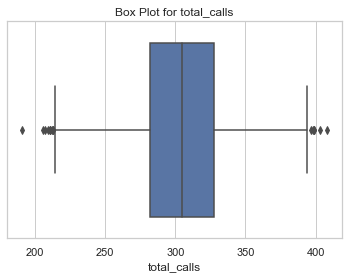

In [140]:
# Display box plots after cleaning data
clean_df.plot_box_plots(
    ["total_day_minutes",
     "total_day_calls",
     "total_day_charge",
     "total_eve_minutes",
     "total_eve_calls",
     "total_eve_charge",
     "total_night_minutes",
     "total_night_calls",
     "total_night_charge",
     "total_intl_minutes",
     "total_intl_calls",
     "total_intl_charge",
     "total_calls"
    ])

Correlation Matrix:
                        account_length  area_code  number_vmail_messages  \
account_length                1.000000  -0.018390               0.000316   
area_code                    -0.018390   1.000000              -0.001504   
number_vmail_messages         0.000316  -0.001504               1.000000   
total_day_minutes             0.003900  -0.011690               0.006860   
total_day_calls               0.035759  -0.009101              -0.009518   
total_day_charge              0.003896  -0.011691               0.006858   
total_eve_minutes            -0.007423  -0.000200               0.012064   
total_eve_calls               0.023840  -0.011802              -0.009589   
total_eve_charge             -0.007409  -0.000173               0.012081   
total_night_minutes          -0.012791  -0.006407               0.003520   
total_night_calls            -0.007251   0.008912               0.010128   
total_night_charge           -0.012796  -0.006428               0.00

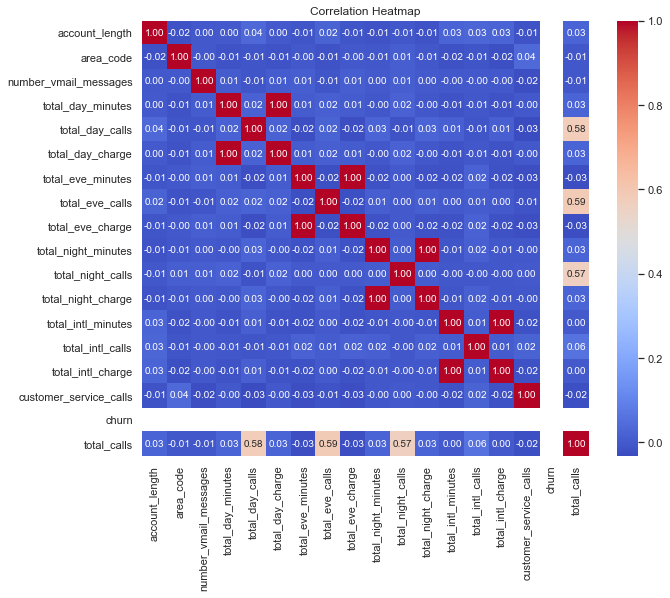

In [141]:
# Check Multicollinear features in our future feature matrix
clean_df.check_multicollinearity()

In [142]:
# These are the remaining features to work on
clean_df.drop_multicollinear_features()

Remaining Features after Dropping Multicollinear Features:
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'customer_service_calls', 'churn', 'total_calls'],
      dtype='object')


### More EDA on numerical data
Create histograms for all numerical features in the DataFrame. Histograms help visualize the distribution of data points for each feature, which is essential for understanding the underlying patterns in the dataset.

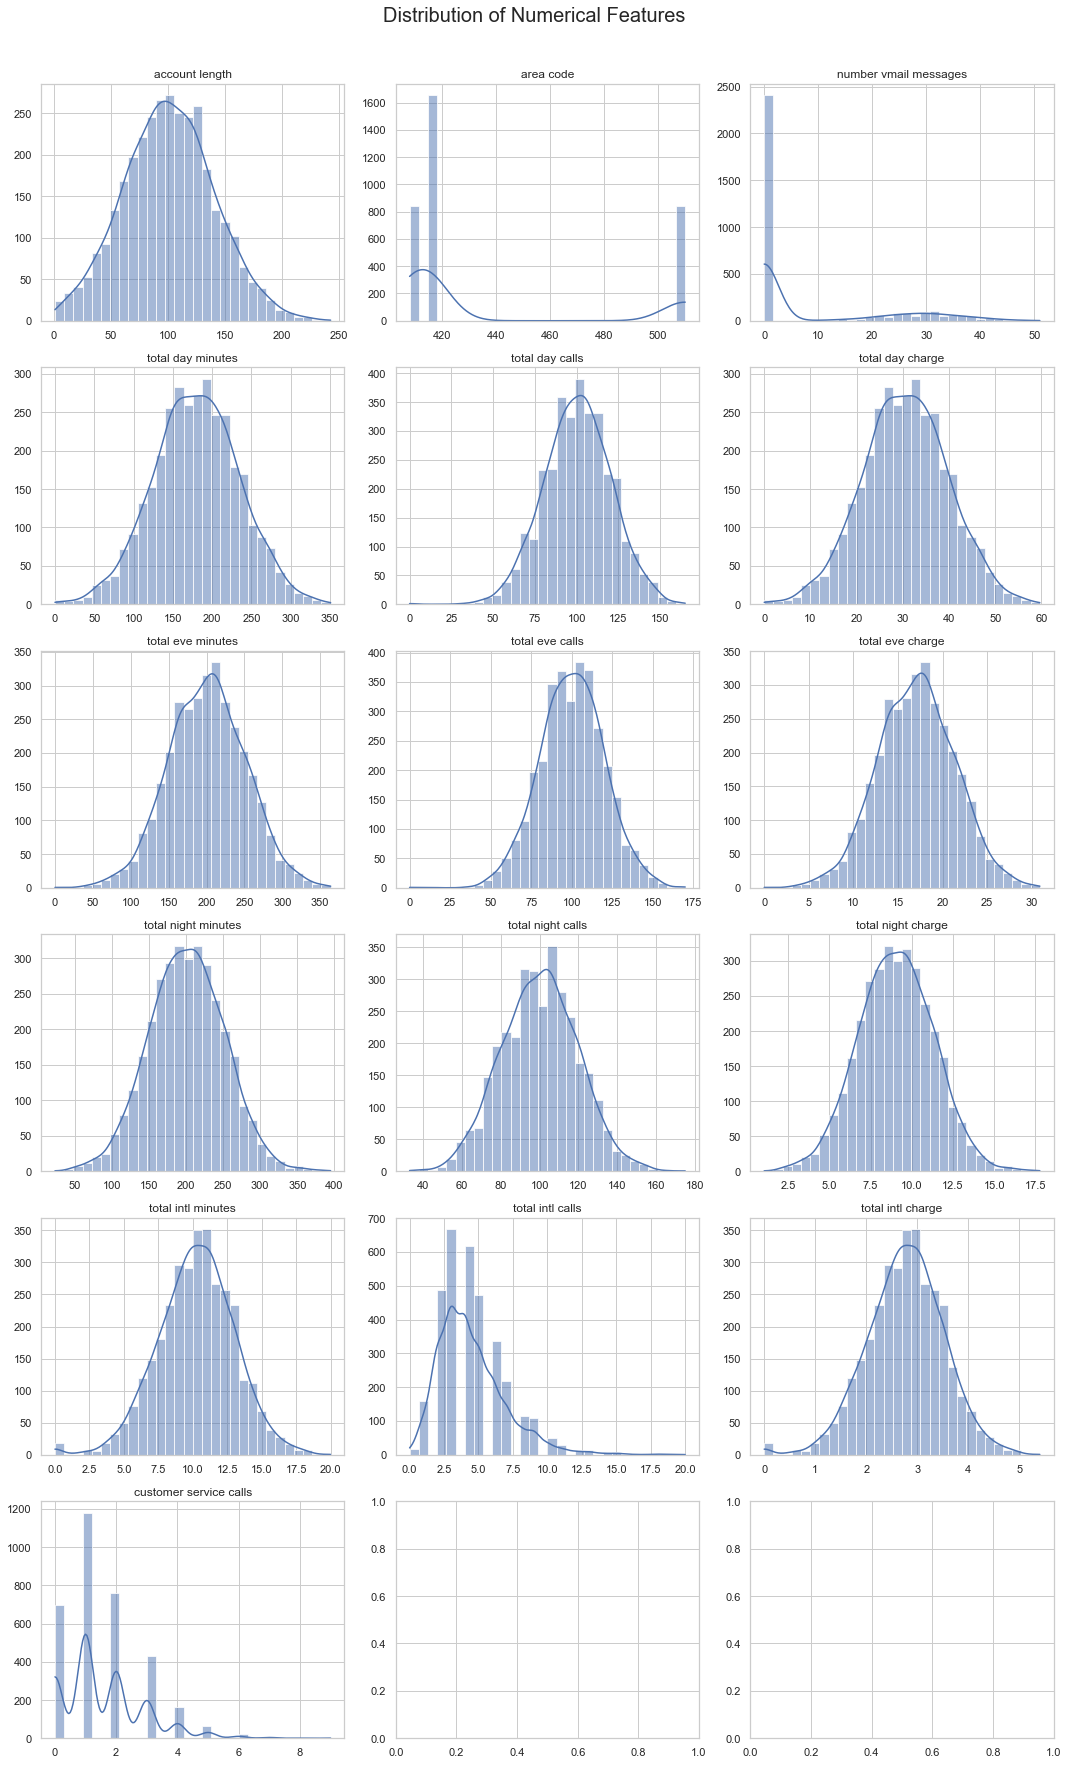

In [143]:
# Setting the style of the visualization
sns.set(style="whitegrid")

# Plot distribution of numerical features
numerical_features = df_.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating histograms for numerical features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))
fig.suptitle('Distribution of Numerical Features', fontsize=20)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_[feature], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show();


In [144]:
churn_distribution = df_['churn'].value_counts()

loyal_percentage = (churn_distribution[False] / churn_distribution.sum()) * 100


print("Distribution of Subscribers based on Churn Attribute:")
print(churn_distribution)
print("\nPercentage of Loyal Subscribers:", loyal_percentage, "%")

Distribution of Subscribers based on Churn Attribute:
False    2850
True      483
Name: churn, dtype: int64

Percentage of Loyal Subscribers: 85.5085508550855 %


In [145]:
df_['total_minutes'] = df_['total day minutes'] + df_['total eve minutes'] + df_['total night minutes'] + df_['total intl minutes']


minutes_by_state = df_.groupby('state')['total_minutes'].sum().sort_values(ascending=False)


state_with_most_minutes = minutes_by_state.idxmax()
most_minutes_count = minutes_by_state.max()


state_with_least_minutes = minutes_by_state.idxmin()
least_minutes_count = minutes_by_state.min()

print(f"State with the most minutes spent on calls: {state_with_most_minutes} ({most_minutes_count} minutes)")
print(f"State with the least minutes spent on calls: {state_with_least_minutes} ({least_minutes_count} minutes)")

State with the most minutes spent on calls: WV (60789.699999999975 minutes)
State with the least minutes spent on calls: CA (20091.000000000004 minutes)


In [146]:
df_['total calls'] = df_['total day calls'] + df_['total eve calls'] + df_['total night calls'] + df_['total intl calls']
df_.groupby('state')['total calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total calls, dtype: int64

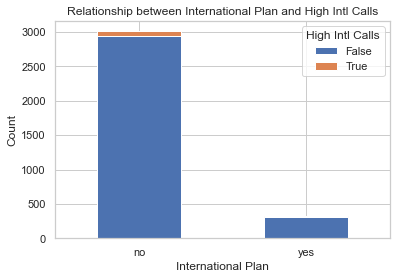

In [147]:
international_calls_threshold = 10

df_['high_intl_calls'] = df_['total intl calls'] > international_calls_threshold

cross_table = pd.crosstab(df_['international plan'], df_['high_intl_calls'])

cross_table.plot(kind='bar', stacked=True)
plt.title('Relationship between International Plan and High Intl Calls')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='High Intl Calls', loc='upper right')
plt.show()

In [148]:
df_['international plan'] = df_['international plan'].map({'yes':1, 'no':0})
df_['voice mail plan'] = df_['voice mail plan'].map({'yes':1, 'no':0})
df_['churn'] = df_['churn'].map({True:1, False:0})

In [149]:
df_numerical = df_[['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'international plan', 'voice mail plan', 'total calls']]
df_numerical.corr().round(2)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan,voice mail plan,total calls
account length,1.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02,0.02,0.00,0.03
number vmail messages,-0.00,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09,0.01,0.96,-0.00
total day minutes,0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21,0.05,-0.00,0.03
total day calls,0.04,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02,0.00,-0.01,0.58
total day charge,0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21,0.05,-0.00,0.03
total eve minutes,-0.01,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09,0.02,0.02,-0.01
total eve calls,0.02,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01,0.01,-0.01,0.59
total eve charge,-0.01,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09,0.02,0.02,-0.01
total night minutes,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.00,-0.01,1.00,0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.04,-0.03,0.01,0.02
total night calls,-0.01,0.01,0.02,-0.02,0.02,0.01,0.01,0.01,0.01,1.00,0.01,-0.01,0.00,-0.01,-0.01,0.01,0.01,0.02,0.56


Model

In [237]:
# Assuming you have a DataFrame called df
df_['international plan'] = df_['international plan'].map({'yes': 1, 'no': 0})

In [232]:
# X = df_[['total day minutes', 'total day charge', 'international plan', 'customer service calls']]
X = df_[['account length', 'total intl calls', 'international plan', 'customer service calls']]
y = df_['churn']
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Confusion Matrix for Decision Tree: 
[[537  29]
 [ 32  69]]

Confusion Matrix for Logistic Regression: 
[[448 118]
 [ 22  79]]

Confusion Matrix for Random Forest: 
[[553  13]
 [ 32  69]]



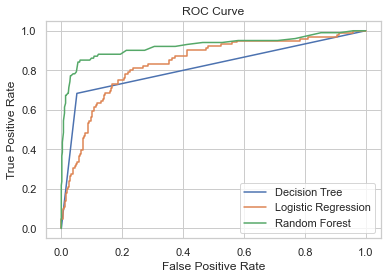

{'Decision Tree': {'Precision': 0.7040816326530612,
                   'Recall': 0.6831683168316832,
                   'Accuracy': 0.9085457271364318},
 'Logistic Regression': {'Precision': 0.4010152284263959,
                         'Recall': 0.7821782178217822,
                         'Accuracy': 0.7901049475262368},
 'Random Forest': {'Precision': 0.8414634146341463,
                   'Recall': 0.6831683168316832,
                   'Accuracy': 0.9325337331334332}}


In [258]:
class ModelComparison:
    def __init__(self, X, y):
        self.X = X
        self.y = y

        # Define preprocessing steps
        self.numeric_features = (
            ['account length', 
             'total intl calls', 
             'total day minutes', 
             'total night minutes',  
             'number vmail messages', 
             'customer service calls', 
             'total night calls', 
             'total day calls', 
             'total eve calls',
             'total intl minutes',
             'total eve minutes'])
        self.categorical_features = ['international plan', 'state', 'voice mail plan']

        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(drop='first'))
        ])

        # Combine preprocessing steps
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ])

    def preprocess_data(self):
        # Preprocess the entire dataset
        X_processed = self.preprocessor.fit_transform(self.X)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_processed, self.y, test_size=0.2, random_state=42)

        # Balancing data using SMOTE
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        
        return X_train_resampled, X_test, y_train_resampled, y_test
    
    def evaluate_models(self):
        X_train_resampled, X_test, y_train_resampled, y_test = self.preprocess_data()

        # Create pipelines for different models
        models = {
            'Decision Tree': DecisionTreeClassifier(),
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier()
        }

        results = {}

        for name, model in models.items():
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test)

            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            results[name] = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

            # Plot ROC curve
            y_pred_proba = model.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=name)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            print(f"Confusion Matrix for {name}: \n{cm}\n")

        plt.show()

        return results

# Assuming df is already defined and preprocessed
X = (
    df_[['account length', 
         'total day minutes', 
         'total night minutes', 
         'total intl calls',
         'total intl minutes',
         'international plan', 
         'customer service calls', 
         'number vmail messages', 
         'state', 
         'total night calls', 
         'total day calls', 
         'total eve calls',
         'total eve minutes',
         'voice mail plan']])
y = df_['churn']

model_comparison = ModelComparison(X, y)
results = model_comparison.evaluate_models()
pprint.pp(results)


In [256]:
print(y.value_counts())

False    2850
True      483
Name: churn, dtype: int64
